## Training the model using cleaned_demographics.csv dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('../Stats Dataset Cleaned/cleaned_demographics.csv')
df.head()

,Year,Territory of asylum or residence,Location Name,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,Kabul,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,2001,Afghanistan,Various,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,2001,Afghanistan,Herat,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2001,Angola,Viana,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,2001,Angola,Moxico,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [6]:
### dropping the unecessary columns which are not numeric

df.drop(columns=['Year', 'Territory of asylum or residence', 'Location Name'], axis=1, inplace=True)

In [7]:
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [8]:
df.columns

Index(['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59',
       'Female 60+', 'F: Unknown', 'F: Total', 'Male 0-4', 'Male 5-11',
       'Male 5-17', 'Male 18-59', 'Male 60+', 'M: Unknown', 'M: Total'],
      dtype='object')

In [9]:
### combining the total male and female population into one single output feature

df['Total Population'] = pd.to_numeric(df['F: Total'], errors='coerce') + pd.to_numeric(df['M: Total'], errors='coerce')


In [10]:
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total,Total Population
0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0,1216624.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0,6559.0
4,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0,2496.0


In [11]:
df.drop(columns=['F: Total', 'M: Total'], axis=1, inplace=True)
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Population
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,1216624.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,597.0,0.0,1645.0,787.0,34.0,0.0,6559.0
4,219.0,0.0,0.0,427.0,25.0,0.0,226.0,0.0,711.0,139.0,15.0,0.0,2496.0


### Now we have a dataset with only numeric features. Now we split the features into independent and dependent features as x and y respectively. 

In [12]:
x=df.drop('Total Population', axis=1)
y=df['Total Population']

In [13]:
x.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,597.0,0.0,1645.0,787.0,34.0,0.0
4,219.0,0.0,0.0,427.0,25.0,0.0,226.0,0.0,711.0,139.0,15.0,0.0


In [14]:
y.head()

0          4.0
1    1216624.0
2          2.0
3       6559.0
4       2496.0
Name: Total Population, dtype: float64

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [17]:
x_train.shape, x_test.shape

((12848, 12), (5507, 12))

In [18]:
x_train.shape, x_test.shape

((12848, 12), (5507, 12))

In [19]:
x_train.columns

Index(['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59',
       'Female 60+', 'F: Unknown', 'Male 0-4', 'Male 5-11', 'Male 5-17',
       'Male 18-59', 'Male 60+', 'M: Unknown'],
      dtype='object')

In [20]:
x_test.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown
10209,0.0,3.0,2.0,7.0,0.0,0.0,1.0,2.0,44.0,13.0,0.0,0.0
17345,102.0,54.0,35.0,116.0,5.0,0.0,97.0,64.0,44.0,178.0,10.0,0.0
13461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44.0,1.0,0.0,0.0
7018,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,44.0,0.0,0.0,0.0
2475,296.0,0.0,0.0,3124.0,371.0,0.0,333.0,0.0,2749.0,3424.0,304.0,0.0


In [21]:
x_test.tail()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown
2694,22.0,0.0,0.0,111.0,5.0,0.0,18.0,0.0,77.0,132.0,2.0,0.0
11465,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,44.0,5.0,0.0,0.0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
17200,11.0,34.0,22.0,64.0,6.0,0.0,13.0,55.0,44.0,33.0,12.0,0.0
7896,2.0,5.0,2.0,21.0,0.0,0.0,3.0,7.0,44.0,48.0,0.0,0.0


In [22]:
y_test.head()

10209       29.0
17345      704.0
13461        2.0
7018         3.0
2475     13279.0
Name: Total Population, dtype: float64

In [23]:
y_test.tail()

2694     466.0
11465      8.0
3015       3.0
17200    266.0
7896      90.0
Name: Total Population, dtype: float64

### Standardizing the data using standardscaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

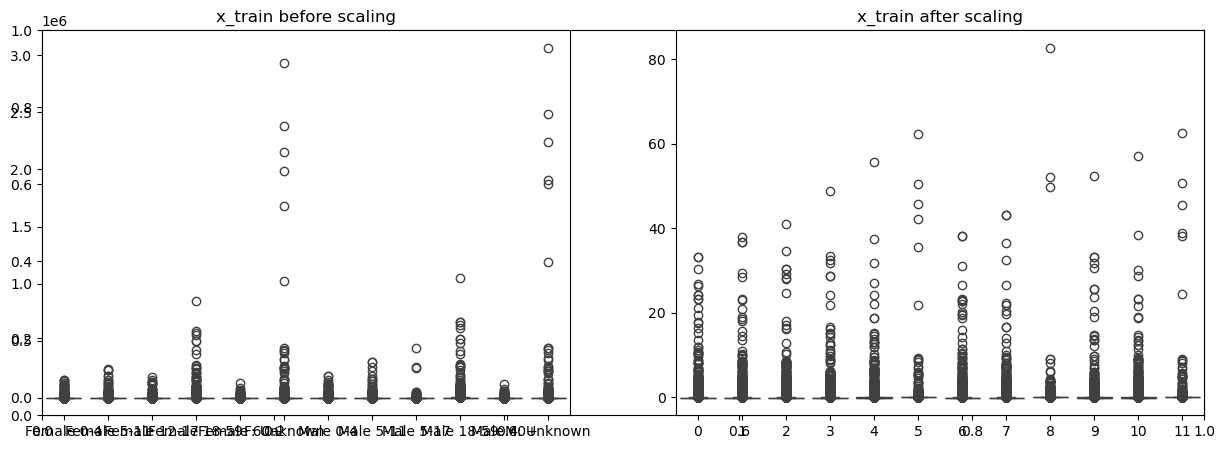

In [27]:
### boxplots to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

Text(0.5, 1.0, 'x_train after scaling')

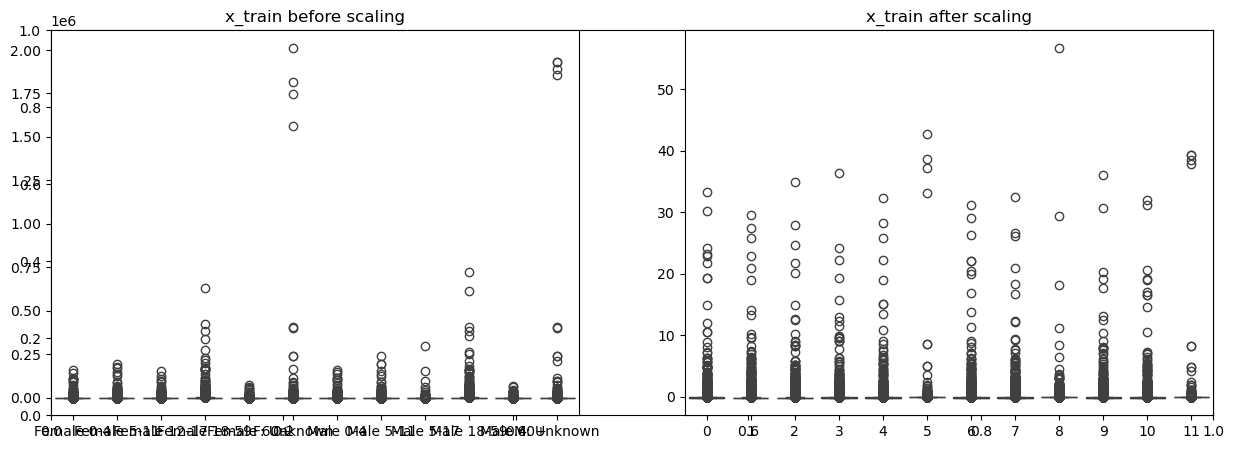

In [28]:
### boxplots to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_test)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_test_scaled)
plt.title('x_train after scaling')

### Doing the regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regression=LinearRegression()

In [31]:
regression.fit(x_train_scaled,y_train)
y_predicted = regression.predict(x_test_scaled)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
accuracy = r2_score(y_test, y_predicted)
mae=mean_absolute_error(y_test, y_predicted)
mse=mean_squared_error(y_test, y_predicted)
print(accuracy)
print(mae)
print(mse)

0.9999748003359833
142.36504661991393
503909.57477386


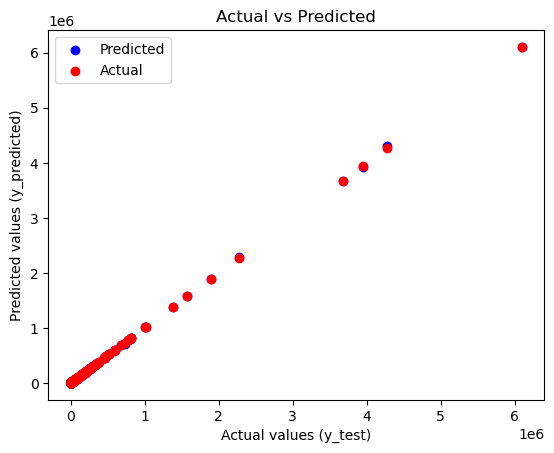

In [34]:
### plotting the actual y_test values and predicted y values using multiple linear regression

plt.scatter(y_test, y_predicted, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_predicted)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [35]:
import pickle

In [36]:
with open('demographics.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [37]:
with open('demographics.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df) 
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 711.8873750806688


In [38]:
with open('demographics.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [0.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df) 
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 12770.35983626004


### Decission Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_scaled, y_train)
dt_predictions = dt_model.predict(x_test_scaled)

dt_mae=mean_absolute_error(y_test,dt_predictions)
dt_accuracy=r2_score(y_test,dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(dt_accuracy)
print(dt_mae)
print(dt_mse)


0.9387697677307991
1609.3595808358598
1224401257.317095


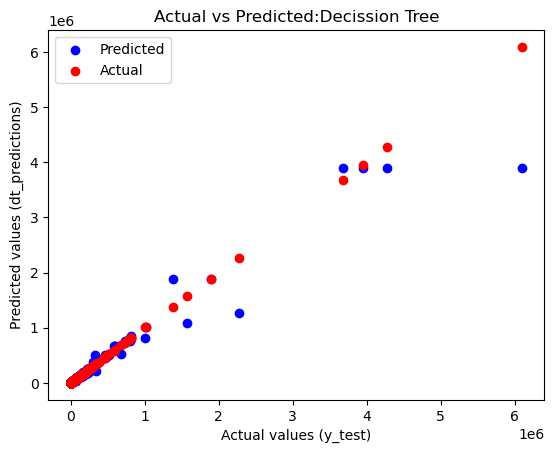

In [40]:
### plotting the actual y_test values and the predicted y values using decission tree regressor

plt.scatter(y_test, dt_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (dt_predictions)')
plt.title('Actual vs Predicted:Decission Tree')
plt.legend()
plt.show()


In [41]:
with open('demographics_decission_tree.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [42]:
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}


test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 725.0


In [43]:
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13271.0


In [44]:
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


test_data = {
    'Female 0-4': [22.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [111.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [18.0],
    'Male 5-11': [0.0],
    'Male 5-17': [77.0],
    'Male 18-59': [132.0],
    'Male 60+': [2.0],
    'M: Unknown': [0.0]
}


test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 486.0


### Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled, y_train)
rf_predictions = rf_model.predict(x_test_scaled)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae= mean_absolute_error(y_test,rf_predictions)
rf_accuracy=r2_score(y_test,rf_predictions)
print(rf_accuracy)
print(rf_mae)
print(rf_mse)


0.9850746353948879
1143.8511882959729
298457714.6150648


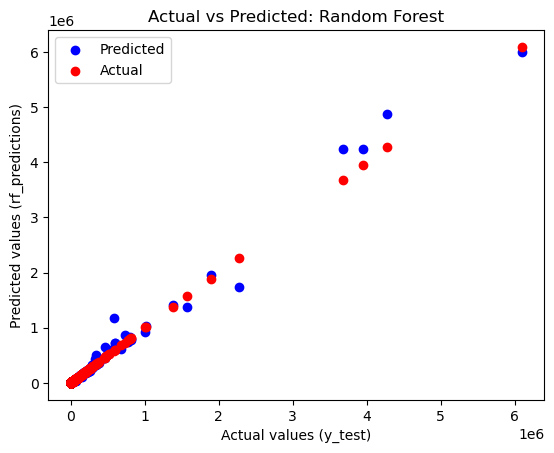

In [46]:
### plotting the actual y_test values and the predicted y_test values using random forest regressor

plt.scatter(y_test, rf_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (rf_predictions)')
plt.title('Actual vs Predicted: Random Forest')
plt.legend()
plt.show()


In [47]:
with open('demographics_random_forest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [48]:
with open('demographics_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 722.3


In [49]:
with open('demographics_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df) 
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13141.53


### XGBoost Regression

In [50]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(x_train_scaled, y_train)
xgb_predictions = xgb_model.predict(x_test_scaled)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae=mean_absolute_error(y_test,xgb_predictions)
xgb_accuracy = r2_score(y_test,xgb_predictions)
print(xgb_accuracy)
print(xgb_mae)
print(xgb_mse)


0.9551883345193266
1721.7499018368324
896084458.9937682


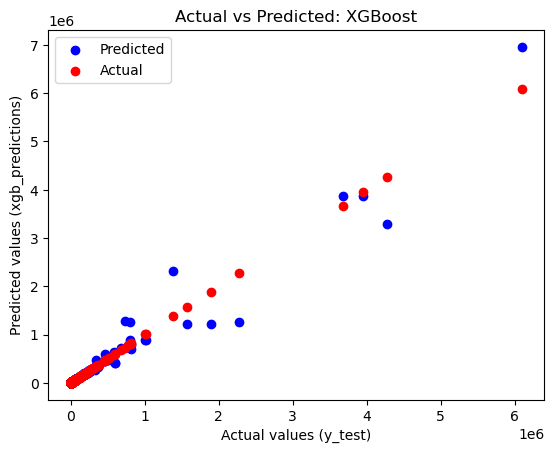

In [51]:
### plootting the actual y_test values and the predicted y_test values using xgboost regressor


plt.scatter(y_test, xgb_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (xgb_predictions)')
plt.title('Actual vs Predicted: XGBoost')
plt.legend()
plt.show()


In [52]:
with open('demographics_xgboost.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [53]:
with open('demographics_xgboost.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 722.3


In [54]:
with open('demographics_xgboost.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13141.53


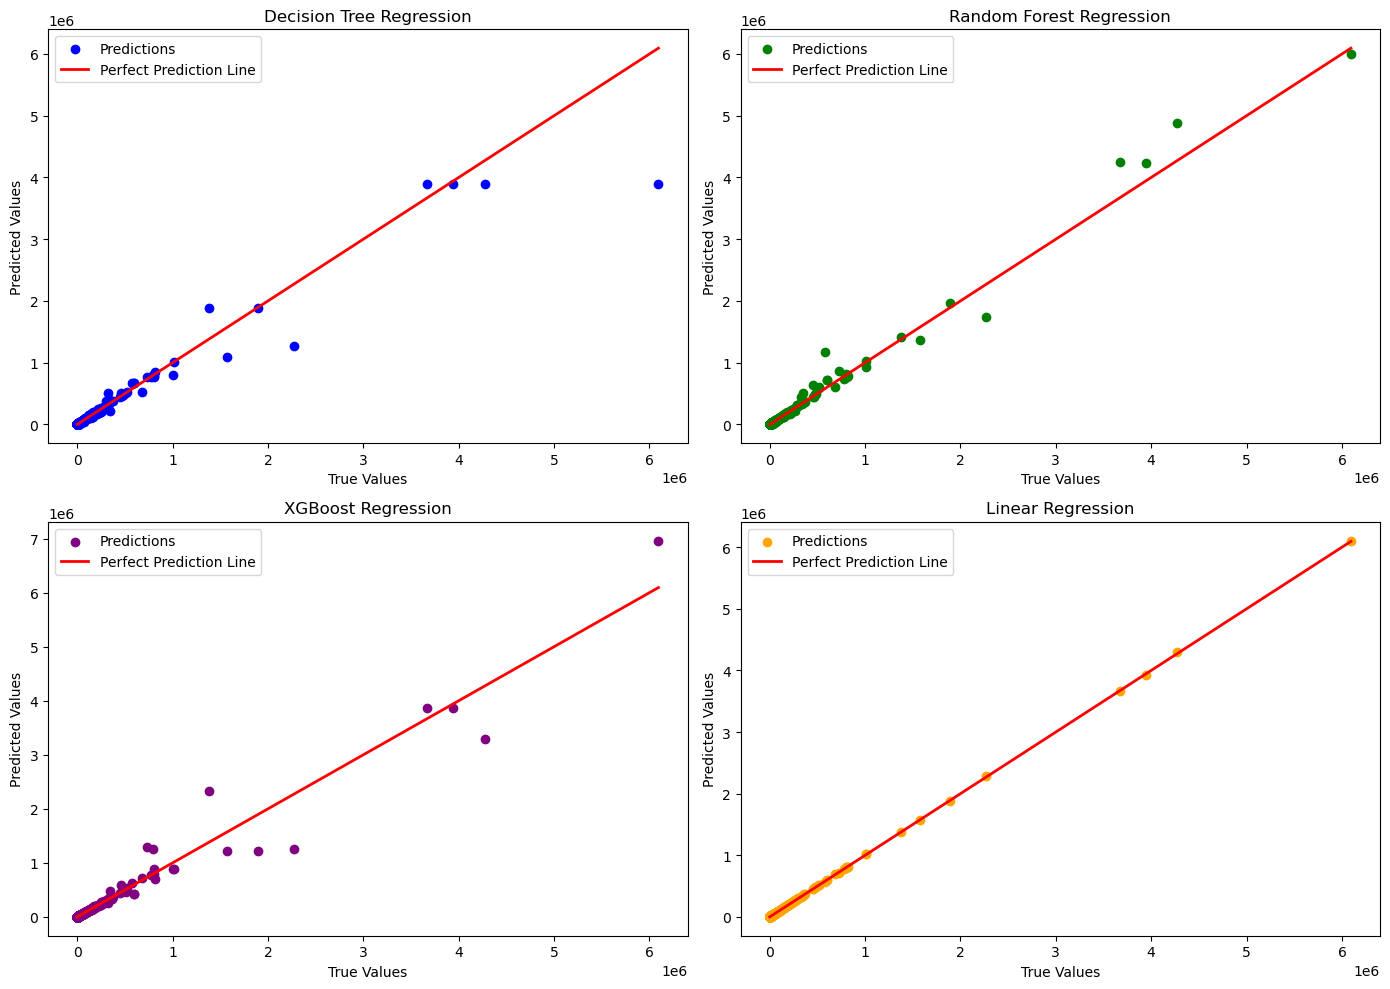

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10)) ## figure size

# Plot for Decision Tree
plt.subplot(2, 2, 1)
plt.scatter(y_test, dt_predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.title('Decision Tree Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plot for Random Forest
plt.subplot(2, 2, 2)
plt.scatter(y_test, rf_predictions, color='green', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.title('Random Forest Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plot for XGBoost
plt.subplot(2, 2, 3)
plt.scatter(y_test, xgb_predictions, color='purple', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.title('XGBoost Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plot for Linear Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_predicted, color='orange', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()
